# Regresion Lineal con Gradiente Descendente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('../Data/ex1data1.txt', names=['population','profit'])

In [3]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
X_df = pd.DataFrame(data.population)
y_df = pd.DataFrame(data.profit)

m=len(y_df)

Text(0, 0.5, 'profit')

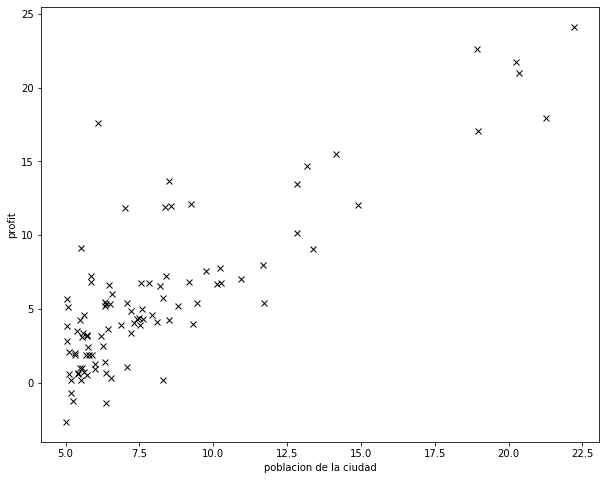

In [6]:
plt.figure(figsize=(10,8))
plt.plot(X_df,y_df, 'kx')
plt.xlabel('poblacion de la ciudad')
plt.ylabel('profit')


El objetivo es estimar el modelo:

$$ \hat{y} = \beta_1 x + \beta_0$$

donde $\beta_1$ es la pendiente y $\beta_0$ es la distancia de la intersección con el eje y.

Podemos estima mediante una ecuación matricial:

$$y=X\beta$$

$$X=[x;0]$$
$$\beta=[\beta_1 \beta_0]$$


Text(0, 0.5, 'profit')

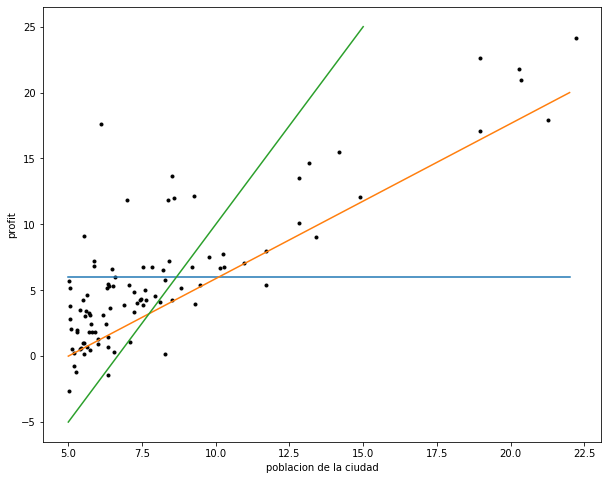

In [8]:
plt.figure(figsize=(10,8))
plt.plot(X_df, y_df, 'k.')
plt.plot([5,22], [6,6],'-')
plt.plot([5,22], [0,20],'-')
plt.plot([5,15], [-5,25],'-')
plt.xlabel('poblacion de la ciudad')
plt.ylabel('profit')



# Implementar la función de costo 

Formalmente definimos la funcion de costo como el error cuadrático medio, qué deberemos minimizar.

$$ J(\beta) = \frac{1}{2m}\sum_{i=1}^m (\hat{y}(x_i) - y_i)^2$$

$\beta = [\beta_0, \beta_1]$

si derivamos parcialmente e igualamos a cero $\frac{\partial J(\beta)}{\partial \beta}=0$



tendríamos que las ecuaciones del algoritmo de gradiente descendente son:

$$ \beta_0 = \beta_0 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)$$

$$ \beta_1 = \beta_1 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)x_i$$



In [9]:
x_quad = [n/10 for n in range(0,100)]
y_quad = [(n-4)**2 + 5 for n in x_quad]

Text(0.5, 1.0, 'Ecuación cuadrática')

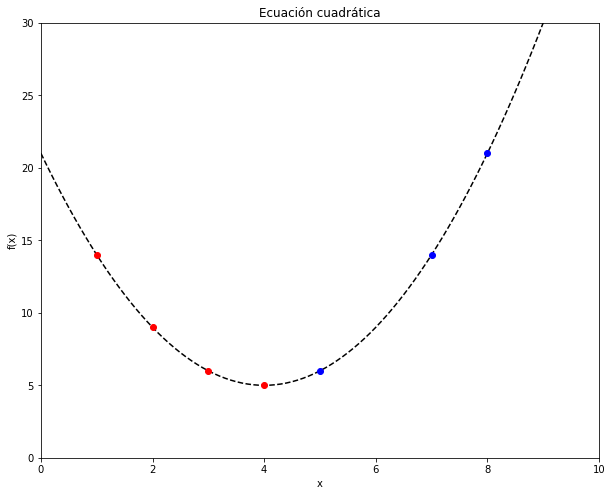

In [10]:
plt.figure(figsize=(10,8))
plt.plot(x_quad, y_quad, 'k--')
plt.axis([0,10,0,30])
plt.plot([1,2,3],[14,9,6], 'ro')
plt.plot([5,7,8],[6,14,21], 'bo')
plt.plot(4,5,'ro')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Ecuación cuadrática')

In [11]:
def cost_function(X, y, beta):
    m=len(y)
    #calcular la función de costo
    J=np.sum((X.dot(beta)-y)**2)/(2*m)
    return J

$$X=[1;x]$$
$$\beta=[\beta_0;\beta_1]$$
$$\hat{y}=X^T\beta = \beta_1 x +\beta_0$$


In [21]:
iteration = 15000
alpha=0.01
X_df['intercept']=1



In [22]:
X = np.array(X_df)
y = np.array(y_df).flatten()
beta = np.array([0,0])


In [23]:
cost_function(X,y, beta)

32.072733877455676

In [24]:
def gradient_descent(X,y,beta, alpha, iterations):
    cost_history = [0]*iterations
    
    for iteration in range(iterations):
        y_hat = X.dot(beta)
        loss = y_hat - y
        gradiente = X.T.dot(loss)/m
        beta = beta - alpha*gradiente
        cost = cost_function(X,y, beta)
        cost_history[iteration] = cost
    
    return beta, cost_history

    

In [25]:
(beta,cost) = gradient_descent(X,y,beta, alpha, iteration)
print(beta)

[ 1.19303364 -3.89578088]


$$ \hat{y}=1.16 x -3.63$$

In [26]:
best_fit_x = np.linspace(0,25,20)
best_fit_y = [beta[1] + beta[0]*xx for xx in best_fit_x]

Text(0, 0.5, 'Profit')

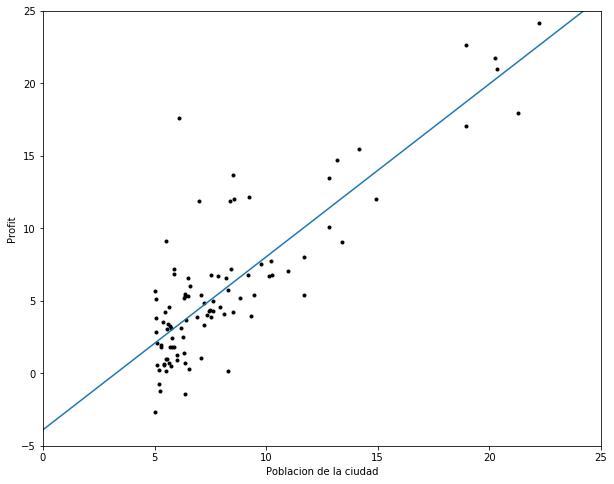

In [27]:
plt.figure(figsize=(10,8))
plt.plot(X_df.population, y_df, 'k.')
plt.plot(best_fit_x, best_fit_y, '-')
plt.axis([0,25,-5,25])
plt.xlabel('Poblacion de la ciudad')
plt.ylabel('Profit')

In [28]:
cost


[6.737190464870009,
 5.931593568604956,
 5.901154707081388,
 5.895228586444221,
 5.89009494311733,
 5.885004158443647,
 5.879932480491418,
 5.874879094762575,
 5.869843911806386,
 5.8648268653129305,
 5.859827889932181,
 5.85484692057229,
 5.849883892376588,
 5.844938740722034,
 5.840011401218361,
 5.8351018097072265,
 5.83020990226139,
 5.825335615183863,
 5.820478885007099,
 5.815639648492154,
 5.81081784262787,
 5.806013404630044,
 5.801226271940628,
 5.796456382226899,
 5.791703673380653,
 5.786968083517396,
 5.782249550975539,
 5.777548014315596,
 5.772863412319381,
 5.768195683989212,
 5.76354476854712,
 5.758910605434049,
 5.754293134309077,
 5.749692295048629,
 5.745108027745684,
 5.740540272709014,
 5.735988970462381,
 5.731454061743792,
 5.726935487504702,
 5.722433188909257,
 5.717947107333528,
 5.713477184364749,
 5.709023361800549,
 5.704585581648199,
 5.700163786123856,
 5.695757917651815,
 5.691367918863752,
 5.68699373259798,
 5.682635301898707,
 5.678292570015292,
 5.6

In [29]:
x=28
np.array([x,1]).dot(beta)

29.509161158984057

In [30]:
x=6
np.array([x,1]).dot(beta)

3.2624209868284932

In [31]:
x=3
np.array([x,1]).dot(beta)

-0.31667994573817415